In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import *
import os
import moviepy.editor as mp
import imageio
import shutil

# This creates a bifurcation diagram 

The equations are defined as:

In [10]:
values = 100

lambda_vals = np.linspace(0.00001, 0.5, values)
R_vals = np.linspace(1, 5, values)
R = 2
LAMBDA = 1/5
DELTA = 1/6
BIF_VALUE_LAMBDA = 'lambda'
BIF_VALUE_R = 'R'

save_fig = True

def eq_1_solver(lambda_value=LAMBDA, lambda_bool=False, R_value=R, R_bool=False): #f < 0
    
    f = sp.symbols('f')
    if lambda_bool:
        equation = sp.Eq(lambda_value * f, R*DELTA/(DELTA-f) - 1/(1-f))
    if R_bool:
        equation = sp.Eq(LAMBDA * f, R_value*DELTA/(DELTA-f) - 1/(1-f))
    solutions = sp.solve(equation, f)
    real_solutions = [sp.re(sol) for sol in solutions]
    return real_solutions[0], real_solutions[1]

def eq_2_solver(lambda_value=LAMBDA, lambda_bool=False, R_value=R, R_bool=False): #f > 0
    f = sp.symbols('f')
    if lambda_bool:
        equation = sp.Eq(lambda_value * f, R*DELTA/(DELTA+f) - 1/(1+f))
    if R_bool:
        equation = sp.Eq(LAMBDA * f, R_value*DELTA/(DELTA+f) - 1/(1+f))
    solutions = sp.solve(equation, f)
    real_solutions = [sp.re(sol) for sol in solutions]
    return real_solutions[0]

In [13]:
f1, f2 = eq_1_solver(R_bool = True)
print(f1)
print(f2)

-1.06790979891806
-0.307026886053647


In [11]:
stable_bif_R = []
saddle_bif_R = []
spiral_bif_R = []

for i in R_vals:
    stable_bif_R.append(eq_1_solver(R_value=i, R_bool=True)[0])
    saddle_bif_R.append(eq_1_solver(R_value=i, R_bool=True)[1])
    spiral_bif_R.append(eq_2_solver(R_value=i, R_bool=True))


In [12]:
print(stable_bif_R)

[-1.50000000000000, -1.48643869903795, -1.47268506710268, -1.45872994670416, -1.44456341674700, -1.43017469985254, -1.41555205467003, -1.40068265009155, -1.38555241750558, -1.37014587620920, -1.35444592576194, -1.33843359728675, -1.32208775333228, -1.30538472265293, -1.28829785176746, -1.27079694885764, -1.25284758660295, -1.23441021755536, -1.21543903646162, -1.19588049494769, -1.17567132910873, -1.15473588915514, -1.13298244304641, -1.11029792649780, -1.08654025746415, -1.06152667226227, -1.03501523205553, -1.00667386322435, -0.976024800927258, -0.942335256883142, -0.904372487094531, -0.859734429332360, -0.802223961312084, -0.666666666666667, 2.49496439077359, 2.48993065468374, 2.48489888562016, 2.47986917840527, 2.47484162879137, 2.46981633345749, 2.46479339000574, 2.45977289695735, 2.45475495374829, 2.44973966072444, 2.44472711913637, 2.43971743113366, 2.43471069975881, 2.42970702894070, 2.42470652348758, 2.41970928907961, 2.41471543226092, 2.40972506043123, 2.40473828183695, 2.399

In [4]:
def find_intersection_saddle_and_stable(saddle_bif, stable_bif):
    intersection = []
    intersection_i = []
    for i in range(len(stable_bif)):
        if abs(saddle_bif[i]-stable_bif[i]) < 0.5:
            intersection.append(stable_bif[i])
            intersection_i.append(i)
    return intersection,intersection_i

intersection_R, intersection_R_i = find_intersection_saddle_and_stable(saddle_bif_R, stable_bif_R)


In [37]:
def make_bifurcation_diagram(values, stable_bif, saddle_bif, spiral_bif, intersection_i,intersection,lambda_,k):
    i = len(intersection_i)-1
    j = 1
    # find the index that is the closest to the value of 7/3 in values
    val_stop = min(range(len(values)), key=lambda i: abs(values[i]-7/3))

    print(f'Stable node: {stable_bif[0]}')
    print(f'Saddle: {spiral_bif}')

    plt.plot(values[0:val_stop+1], stable_bif[0:val_stop+1], label='Stable node')
    plt.plot(values[0:val_stop], saddle_bif[0:val_stop],label='Saddle', linestyle='dashed')
    plt.plot(values, spiral_bif, label='Stable Spiral')

    #if k < intersection_i[i]+j:
    #    plt.scatter(values[k], stable_bif[k], color='red', marker='o', label='First Saddle')
    #else:
    #    plt.scatter(values[k], spiral_bif[k], color='red', marker='o', label='First Stable Node')

    plt.ylabel(r'equilibrium values of $f$')
    plt.ylim(-4, 1)
    if lambda_:
        bif_val = r'$\lambda$'
        BIF_VALUE = 'lambda'
        bif_val_int = 0.333800508
        plt.xlabel(f'flow resistance {bif_val}')
        plt.xlim(0, 0.5)
        plt.xticks([0, 0.1, 0.2, 0.3, 0.338, 0.4, 0.5], [0.0, 0.1, 0.2, 0.3, r'$\lambda_b$', 0.4, 0.5])
    else:
        bif_val = r'$R$'
        BIF_VALUE = 'R'
        bif_val_int = 7/3
        plt.xlabel(f'Ratio of expansion coefficients {bif_val}')
        plt.xlim(1, 5)
        plt.xticks([1, 2, 3, bif_val_int, 4, 5], [1, 2, 3, r'$R_0$', 4, 5])


    x_start = bif_val_int
    y_start = stable_bif[-1]
    x_end = bif_val_int
    y_end = spiral_bif[-1]

   # arrow_props = dict(arrowstyle='->', color='k', lw=1, ls='dashed')
    #plt.annotate('', xy=(x_end, y_end+0.07), xytext=(x_start, intersection[-1]),
    #         arrowprops=arrow_props, fontsize=9, color='k')

    #plt.legend()
    folder_name = 'Plots for bifurcation diagram R'
    folder_path = os.path.join(os.getcwd(), folder_name)
    
    # Ensure the folder exists, create it if it doesn't
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    file_name = f'bifurcation_diagram_{BIF_VALUE}_{k}.png'
    desktop_path = os.path.join(folder_path, file_name)

    if save_fig:
        plt.savefig(desktop_path, dpi=600)



Stable node: -1.50000000000000
Saddle: [0.0, 0.00781417426866574, 0.0157168545176803, 0.0237082585032653, 0.0317885463213757, 0.0399578179003021, 0.0482161105507651, 0.0565633965887621, 0.0649995810470605, 0.0735244994916527, 0.0821379159598773, 0.0908395210371143, 0.0996289300890266, 0.108505681666225, 0.117469236097955, 0.126518974290931, 0.135654196748805, 0.144874122826873, 0.154177890235564, 0.163564554805021, 0.173033090521573, 0.182582389845308, 0.192211264316054, 0.201918445453200, 0.211702585952541, 0.221562261181216, 0.231495970969362, 0.241502141694823, 0.251579128654763, 0.261725218715659, 0.271938633230773, 0.282217531211890, 0.292560012739957, 0.302964122597159, 0.313427854101157, 0.323949153120478, 0.334525922248663, 0.345156025113500, 0.355837290796804, 0.366567518339486, 0.377344481306291, 0.388165932384450, 0.399029607990706, 0.409933232861563, 0.420874524602337, 0.431851198171496, 0.442860970277954, 0.453901563670314, 0.464970711298555, 0.476066160330365, 0.487185676

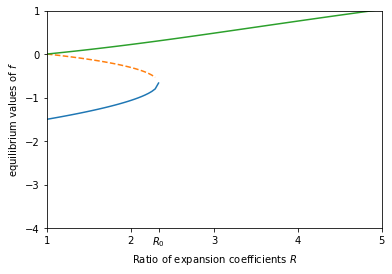

In [38]:
make_bifurcation_diagram(R_vals, 
                            stable_bif_R, 
                            saddle_bif_R, 
                            spiral_bif_R, 
                            intersection_R_i,
                            intersection_R, 
                            False,
                            i)